In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import math

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Create CNNs

In [20]:
dt = 0.1
dx = 1 
Dx = 200.0
Dy = 100.0
Dz = 50.0
ub = 500

In [21]:
# the weights matrix
alpha = 1 # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128
ny = 128
nz = 128
w1 = np.zeros([1,2,2,2,1])
w1[0][0][0][0][0] = 0.125
w1[0][0][1][0][0] = 0.125
w1[0][0][0][1][0] = 0.125
w1[0][0][1][1][0] = 0.125
w1[0][1][0][0][0] = 0.125
w1[0][1][1][0][0] = 0.125
w1[0][1][0][1][0] = 0.125
w1[0][1][1][1][0] = 0.125
w2 = np.zeros([1,3,3,3,1])

pd1 = [[0.0, 0.0,  0.0],
       [0.0, 1.0*dt*Dz/dx**2,  0.0],
       [0.0, 0.0,  0.0]]
pd2 = [[0.0, 1.0*dt*Dy/dx**2,  0.0],
       [1.0*dt*Dx/dx**2,  -2*dt*(Dx+Dy+Dz)/dx**2,  1.0*dt*Dx/dx**2],
       [0.0, 1.0*dt*Dy/dx**2,  0.0]]
pd3 = [[0.0, 0.0,  0.0],
       [0.0, 1.0*dt*Dz/dx**2,  0.0],
       [0.0, 0.0,  0.0]]

pau1 = [[0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0]]
pau2 = [[ 0.0,  0.0,  0.0],
       [-1.0*dt*ub/dx,  1+3*dt*ub/dx,  0.0],
       [0.0,  -1.0*dt*ub/dx,  0.0]]
pau3 = [[0.0, 0.0, 0.0],
       [0.0, -1.0*dt*ub/dx, 0.0],
       [0.0, 0.0, 0.0]]

w2[0,0,:,:,0] = -np.array(pd1) #+ np.array(pau1) 
w2[0,1,:,:,0] = -np.array(pd2) #+ np.array(pau2) 
w2[0,2,:,:,0] = -np.array(pd3) #+ np.array(pau3) 

In [22]:
sum(sum(sum(sum(w2))))

array([0.])

In [23]:
w2[0,1,:,:,0]

array([[ -0., -10.,  -0.],
       [-20.,  70., -20.],
       [ -0., -10.,  -0.]])

In [24]:
w2[0,1,1,1,0]

70.0

### Weights of layers

In [25]:
init_kernel_1 = w1 
init_kernel_2 = w2
kernel_initializer_1 = tf.keras.initializers.constant(init_kernel_1)
kernel_initializer_2 = tf.keras.initializers.constant(init_kernel_2)
init_bias = np.zeros((1,)) 
bias_initializer = tf.keras.initializers.constant(init_bias)

### A matrix 

In [26]:
CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, ny, nz, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer="zeros")
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 64, 64, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 32, 32, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 16, 16, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 8, 8, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 4, 4, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 2, 2, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1, 1, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_128.summary()
CNN3D_A_1.get_weights()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_15 (Conv3D)           (None, 128, 128, 128, 1)  28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


[array([[[[[ -0.]],
 
          [[ -0.]],
 
          [[ -0.]]],
 
 
         [[[ -0.]],
 
          [[ -5.]],
 
          [[ -0.]]],
 
 
         [[[ -0.]],
 
          [[ -0.]],
 
          [[ -0.]]]],
 
 
 
        [[[[ -0.]],
 
          [[-10.]],
 
          [[ -0.]]],
 
 
         [[[-20.]],
 
          [[ 70.]],
 
          [[-20.]]],
 
 
         [[[ -0.]],
 
          [[-10.]],
 
          [[ -0.]]]],
 
 
 
        [[[[ -0.]],
 
          [[ -0.]],
 
          [[ -0.]]],
 
 
         [[[ -0.]],
 
          [[ -5.]],
 
          [[ -0.]]],
 
 
         [[[ -0.]],
 
          [[ -0.]],
 
          [[ -0.]]]]], dtype=float32), array([0.], dtype=float32)]

### Restriction

In [27]:
CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, ny, nz, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 64, 64, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 32, 32, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 16, 16, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 8, 8, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 4, 4, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 2, 2, 1)),
         tf.keras.layers.Conv3D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

CNN3D_res_2.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 1, 1, 1, 1)        9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Prolongation

In [28]:
CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1, 1, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 2, 2, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 4, 4, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 8, 8, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 16, 16, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 32, 32, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 64, 64, 1)),
         tf.keras.layers.UpSampling3D(size=(2, 2, 2)),
])

CNN3D_prol_1.summary()
#CNN2D_prol_1.get_weights()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling3d_7 (UpSampling3 (None, 2, 2, 2, 1)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


# Load data

In [29]:
import math
T = np.zeros([nx,ny,nz])
gamma = 10
# initialise t:
x0 = 0 
y0 = 0
z0 = 0
x = np.zeros([1,nx])
y = np.zeros([1,ny])
z = np.zeros([1,nz])
for ii in range(nx):
    x[0][ii] = -63.5 + 128/nx*ii
    y[0][ii] = -63.5 + 128/nx*ii    
    z[0][ii] = -63.5 + 128/nx*ii   
for i in range(40):
    for j in range(40):
        for k in range(40):
            T[i+43][j+43][k+43] = 1 
#for i in range(nx):
#    for j in range(ny):
#        for k in range(nz):
#            temp1 = ((x[0][i] - x0)**2 + (y[0][j] - y0)**2 + (z[0][j] - z0)**2)
#            temp2 = 2*gamma**2
#            if temp1**0.5 <= 20:
#                T[i][j][k] = 1 #math.exp(temp1/temp2)
#            T[i+43][j+43][k+43] = 1 

In [30]:
input_shape = (1,nx,ny,nz,1)
values = np.zeros(input_shape)
values.shape
print('values.shape: ', values.shape)

values.shape:  (1, 128, 128, 128, 1)


Text(0.5, 1.0, 'central xy plane')

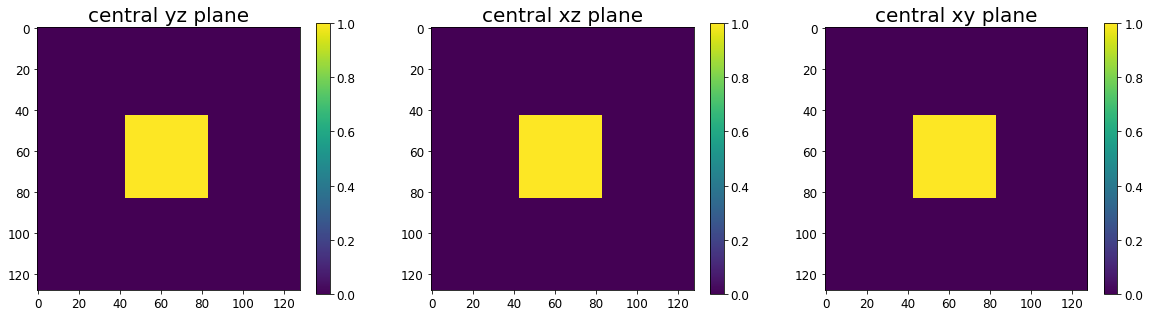

In [31]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(T[:,:,63])
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(T[:,63,:])
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(T[63,:,:])
plt.colorbar()
plt.title('central xy plane',Fontsize=20)


# Initial condition

Text(0.5, 1.0, 'central xy plane')

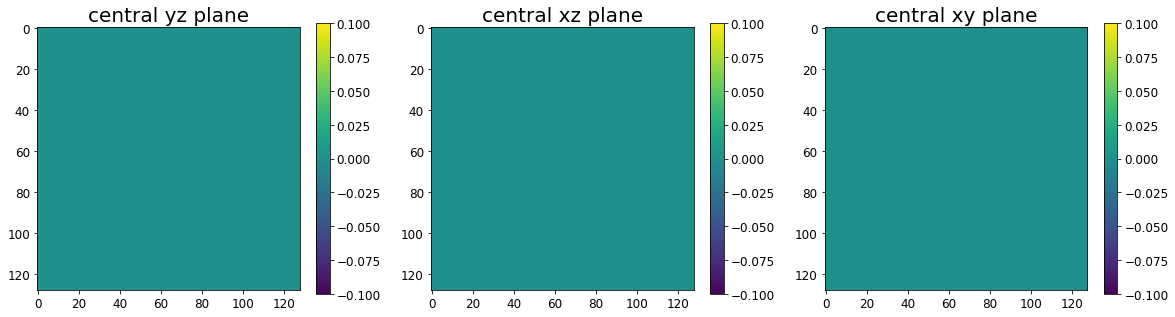

In [32]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(values[0,:,:,63,0])
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(values[0,:,63,:,0])
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(values[0,63,:,:,0])
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

### skipping layer

In [33]:
for t in range(100):
    values[0,:,:,:,0] = values[0,:,:,:,0] + T
    b = values # only for one time step
    multi_itr = 10
    j_itr = 1
    norm_0_error = np.zeros([1,multi_itr])
#save_itr = np.zeros([5,nx,ny,1])  
#tt = -1
#PLOT = 0
    for multi_grid in range(multi_itr):    
        w = np.zeros([1,1,1,1,1])
        r = CNN3D_A_128.predict(values) - b             
        r_64 = CNN3D_res_128.predict(r) 
        r_32 = CNN3D_res_64.predict(r_64) 
        r_16 = CNN3D_res_32.predict(r_32) 
        r_8 = CNN3D_res_16.predict(r_16) 
        r_4 = CNN3D_res_8.predict(r_8) 
        r_2 = CNN3D_res_4.predict(r_4) 
        r1 = CNN3D_res_2.predict(r_2)    
    
        for Jacobi in range(j_itr):
            w = w - CNN3D_A_1.predict(w)/w2[0,1,1,1,0] + r1/w2[0,1,1,1,0]
        w = w - CNN3D_A_1.predict(w)/w2[0,1,1,1,0] + r1/w2[0,1,1,1,0]
        w_2 = CNN3D_prol_1.predict(w)                   
#    for Jacobi in range(j_itr):
#        w_2 = w_2 - CNN3D_A_2.predict(w_2)/p2[1][1] + r_2/p2[1][1]
        w_4 = CNN3D_prol_2.predict(w_2) 
        for Jacobi in range(j_itr):
            w_4 = w_4 - CNN3D_A_4.predict(w_4)/w2[0,1,1,1,0] + r_4/w2[0,1,1,1,0]
        w_8 = CNN3D_prol_4.predict(w_4) 
        for Jacobi in range(j_itr):
            w_8 = w_8 - CNN3D_A_8.predict(w_8)/w2[0,1,1,1,0] + r_8/w2[0,1,1,1,0]
        w_16 = CNN3D_prol_8.predict(w_8) 
        for Jacobi in range(j_itr):
            w_16 = w_16 - CNN3D_A_16.predict(w_16)/w2[0,1,1,1,0] + r_16/w2[0,1,1,1,0]
        w_32 = CNN3D_prol_16.predict(w_16) 
        for Jacobi in range(j_itr):
            w_32 = w_32 - CNN3D_A_32.predict(w_32)/w2[0,1,1,1,0] + r_32/w2[0,1,1,1,0]
        w_64 = CNN3D_prol_32.predict(w_32)
        for Jacobi in range(j_itr):
            w_64 = w_64 - CNN3D_A_64.predict(w_64)/w2[0,1,1,1,0] + r_64/w2[0,1,1,1,0]
        w_128 = CNN3D_prol_64.predict(w_64)
        w_128 = w_128 - CNN3D_A_128.predict(w_128)/w2[0,1,1,1,0] + r/w2[0,1,1,1,0]
        values = values - w_128 
        values = values - CNN3D_A_128.predict(values)/w2[0,1,1,1,0] + b/w2[0,1,1,1,0]
#    norm_0_error[0][multi_grid] = sum(sum(sum(sum(r)))) / (nx*ny)      

#    if PLOT == 1:
#        if multi_grid == 0 or multi_grid == 5 or multi_grid == 10 or multi_grid == 15 or multi_grid == 20:
#            tt = tt + 1
#            save_itr[tt,:,:,0] = values[0,:,:,0]
#            fig = plt.imshow(values[0,:,:,0])
#            plt.axis('off') 
#            plt.colorbar(fig, format='%.0e')
#            fig_name = "paper_figure/figure_3_v2/iter_"+str(multi_grid)+".jpg"
#            plt.savefig(fig_name, dpi=200, bbox_inches='tight')        
#            plt.close()

Text(0.5, 1.0, 'central xy plane')

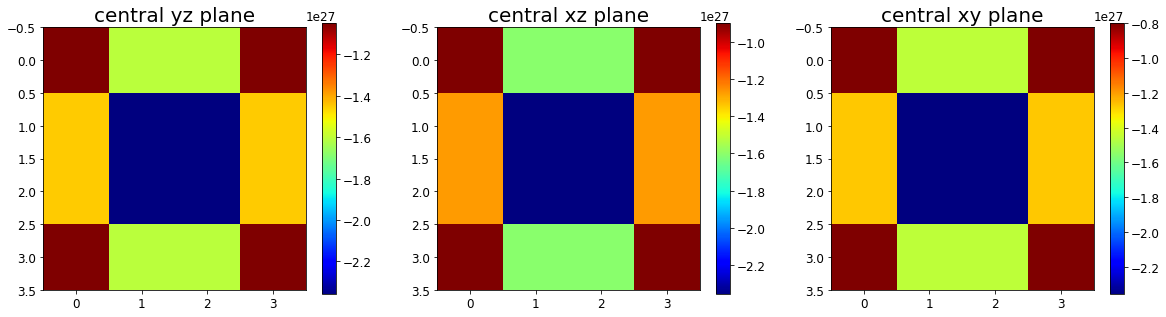

In [35]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_4[0,:,:,2,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_4[0,:,2,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_4[0,2,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

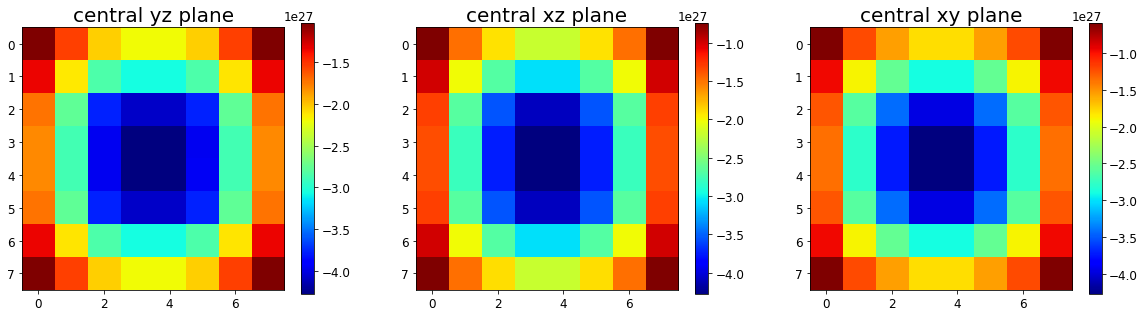

In [36]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_8[0,:,:,4,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_8[0,:,4,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_8[0,4,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

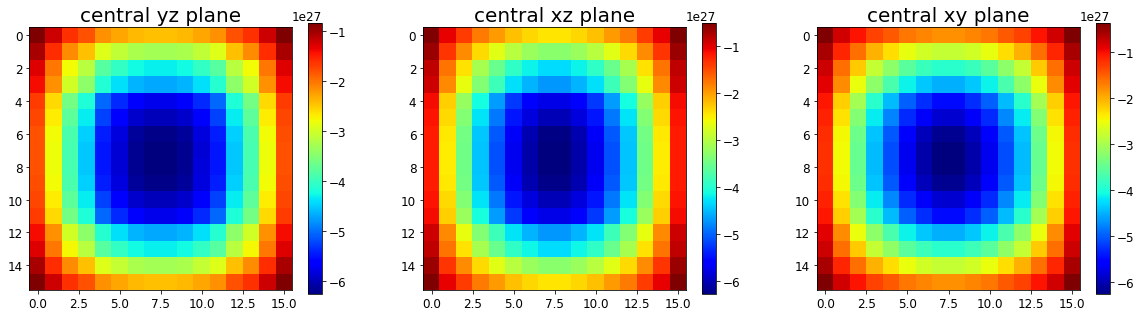

In [37]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_16[0,:,:,8,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_16[0,:,8,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_16[0,8,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

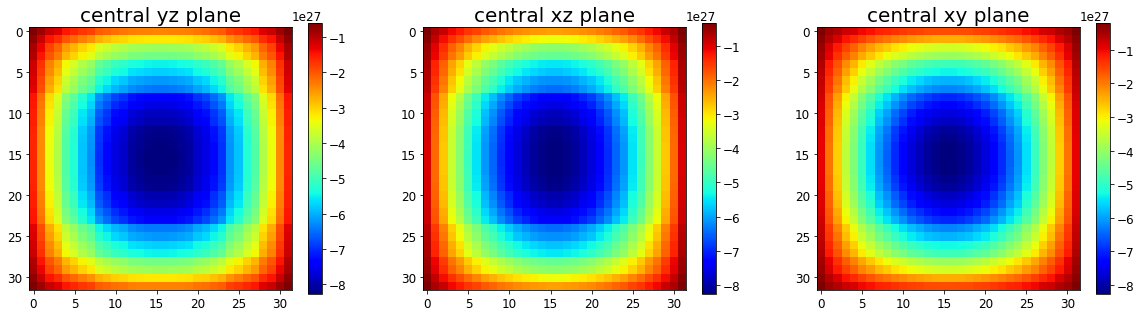

In [38]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_32[0,:,:,16,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_32[0,:,16,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_32[0,16,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

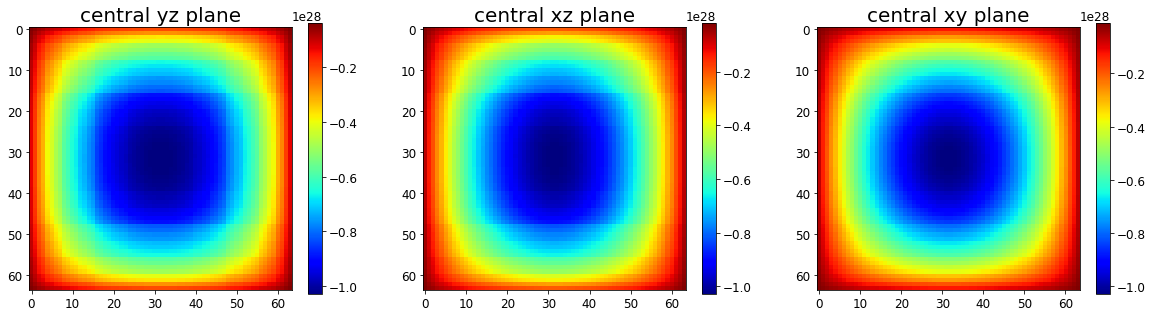

In [39]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_64[0,:,:,32,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_64[0,:,32,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_64[0,32,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

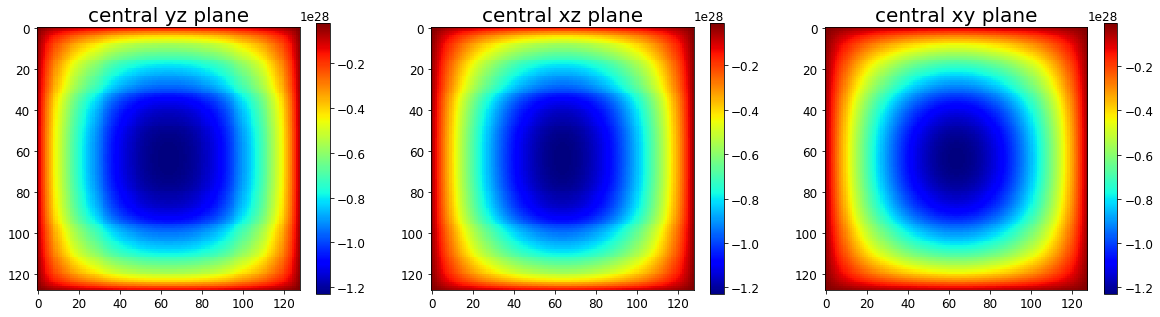

In [40]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(w_128[0,:,:,64,0], cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(w_128[0,:,64,:,0], cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(w_128[0,64,:,:,0], cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)

Text(0.5, 1.0, 'central xy plane')

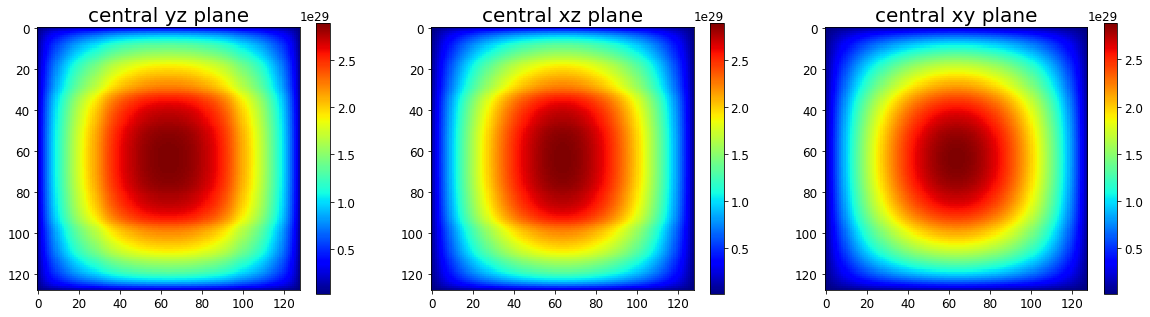

In [41]:
fig, ax = plt.subplots(1,3, figsize=[20,5])
plt.subplot(1,3,1)
plt.imshow(values[0,:,:,64,0],cmap='jet')
plt.colorbar()
plt.title('central yz plane',Fontsize=20)
plt.subplot(1,3,2)
plt.imshow(values[0,:,64,:,0],cmap='jet')
plt.colorbar()
plt.title('central xz plane',Fontsize=20)
plt.subplot(1,3,3)
plt.imshow(values[0,64,:,:,0],cmap='jet')
plt.colorbar()
plt.title('central xy plane',Fontsize=20)